# Step 4: Plotting Curves

In [8]:
# Import libraries
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

ModuleNotFoundError: No module named 'vaderSentiment'

In [10]:
# Read CSV
cleaned_speeches = pd.read_csv("part3.csv", index_col = 0)
cleaned_speeches.head()

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,FleschReadingEase
0,speeches\obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575
1,speeches\obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806
2,speeches\obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[' Mr', ' Speaker, Mr', ' Vice President, memb...",518,81.474903,17.344065,26.228014
3,speeches\obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.553846,14.187551,52.062427
4,speeches\obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649


In [11]:
cleaned_speeches["sentences"] = cleaned_speeches.sentences.apply(lambda x: ast.literal_eval(x))

NameError: name 'ast' is not defined

In [38]:
# Create a DataFrame from Obama's 2010 speech
obama2010 = pd.DataFrame(cleaned_speeches.sentences[0])
obama2010.columns = ["sentences"]

obama2010

,sentences
0,"Madam Speaker, Vice President Biden, members o..."
1,"For 220 years, our leaders have fulfilled thi..."
2,They've done so during periods of prosperity ...
3,And they've done so in the midst of war and d...
4,\n\nIt's tempting to look back on these moment...
...,...
557,)\n\nThank you
558,God bless you
559,And God bless the United States of America
560,(Applause


In [12]:
# Get the compound score of each row's sentence

analyzer = SentimentIntensityAnalyzer()
compound_list = []
for sentence in obama2010.sentences:
    vs = analyzer.polarity_scores(sentence)
    compound_list.append(float(vs["compound"]))
    # print(int(vs["compound"])
    # print(type(vs["compound"]))
obama2010 = obama2010.assign(compound = compound_list)

NameError: name 'SentimentIntensityAnalyzer' is not defined

In [13]:
# Create the index column
indexes = [i for i in range(len(obama2010))]
obama2010["index"] = indexes

NameError: name 'obama2010' is not defined

### Normalize the values in the index column
Normalization means bringing the set of values to be between 0 and 1. 

We divide all of the values in the column with the largest number, i.e. the last value in the column.

In [14]:
obama2010 = obama2010.assign(index = lambda x: x.index / (len(obama2010)-1))
obama2010

NameError: name 'obama2010' is not defined

<AxesSubplot:xlabel='index', ylabel='compound'>

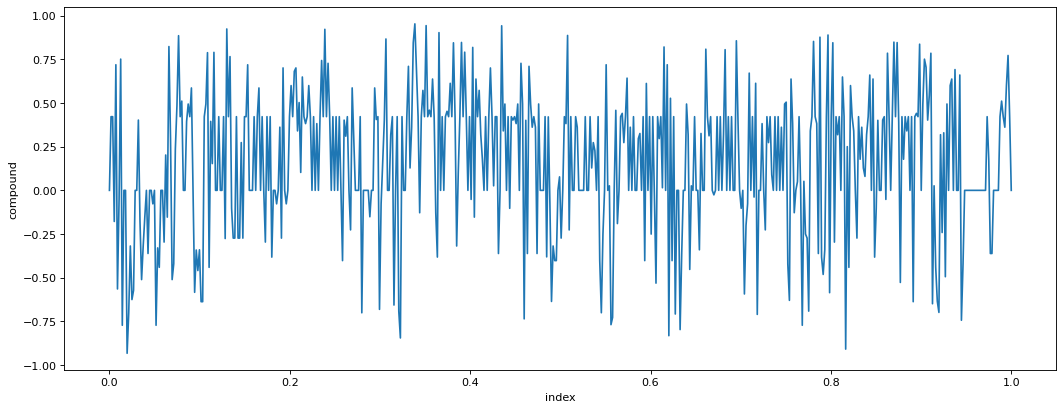

In [42]:
# Plot index vs compound

plt.figure(figsize=(16, 6), dpi=80)
sns.lineplot(data = obama2010, x = "index", y = "compound") 

In [52]:
from scipy.interpolate import griddata
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
grid_z0 = griddata(numbers, obama2010.compound, (grid_x, grid_y), method='nearest')
#grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
#grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

ValueError: invalid number of dimensions in xi

In [43]:
# Plot an interpolated smooth curve for Obama's 2010 speech
numbers = np.linspace(0.0,1.0,20)
numbers

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

<class 'numpy.ndarray'>


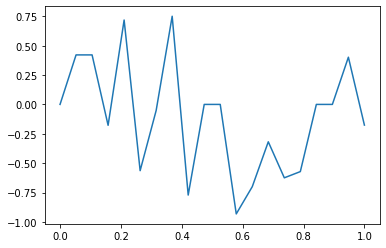

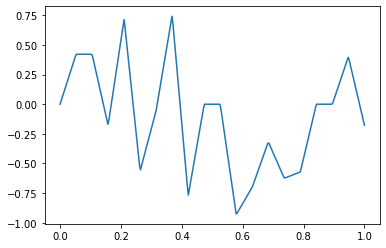

In [63]:
import matplotlib.pyplot as plt
import numpy as np

T = numbers
power = obama2010.compound.to_numpy()[0:20]

print(type(obama2010.compound.to_numpy()))



plt.plot(T,power)
plt.show()

from scipy.interpolate import make_interp_spline, BSpline

# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(T.min(), T.max(), 300) 

spl = make_interp_spline(T, power, k=1)  # type: BSpline
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth)
plt.show()

# The End

In this project, we explored the SOTU speeches of Obama and Trump, gaining valuable insights in the way they structure their speech. We see a difference in their readability scores, the sentence lengths and more. We may expand the scope of this project by analysing different speeches (for instance, campaign/rally speeches) or using different readability measures.